# Trabalho de Processamento de Linguagem Natural




##### Professor: Alex 

##### Alunos: Cauã, Lucas Leal, Isaac e Pedro Lopes


# __________________________________________________________________________________________________________________________________
#  

#  
#  

## Instalando bibliotecas que serão utilizadas

In [11]:
!pip install -r requirements.txt

## Preparação do Corpus e Pré-Processamento
* Atividade:

    * Carregar o corpus de poesias de Fernando Pessoa em um Jupyter Notebook.
    * Realizar tokenização de sentenças e palavras.
    * Remover stopwords e pontuação para facilitar a análise.
    * Criar uma nuvem de palavras (WordCloud) para visualizar termos mais frequentes.

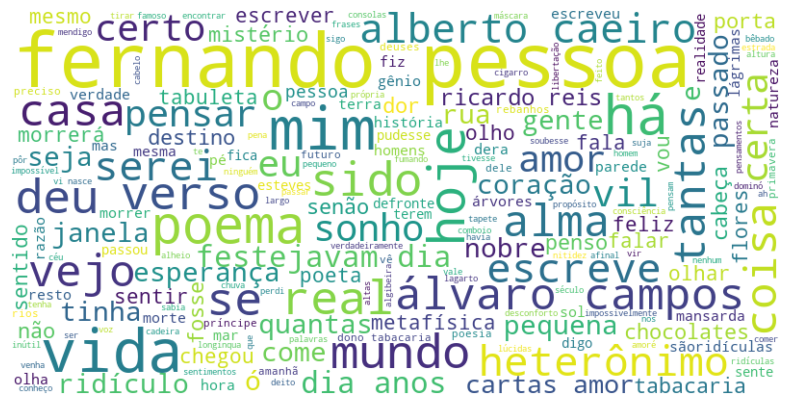

In [ ]:
import spacy  # Importar a biblioteca spaCy para processamento de linguagem natural
import matplotlib.pyplot as plt  # Importar a biblioteca Matplotlib para visualização de dados
from wordcloud import WordCloud  # Importar a biblioteca WordCloud para criação de nuvens de palavras
import requests
from bs4 import BeautifulSoup

# Lista de textos a serem excluídos
excluir_textos = [
    "Fernando Pessoa (1888-1935) foi um poeta português conhecido por escrever sobre a vida, o amor, a natureza e outros temas. Pessoa criou heterônimos, ou seja, diferentes nomes de escritores, cada um com uma personalidade. Os mais conhecidos são: Álvaro de Campos, Alberto Caeiro e Ricardo Reis.",
    "Biografia de Fernando Pessoa e seus heterônimos\nFernando Pessoa foi um poeta que marcou o Modernismo. Ele publicou um único livro em vida: Mensagem. Por essa razão, muitos dos poemas e textos famosos dele foram publicados apenas em revistas e jornais da sua época.",
    "O famoso poeta português ficou conhecido por abordar, na sua literatura, temas sobre a história de Portugal, a vida e a natureza. O poeta se voltou para o seu interior, escrevendo sobre o seu passado, o seu saudosismo com outros tempos, as suas nostalgias, os seus momentos de tédio e as suas inquietações.",
    "Fernando Pessoa chegou a se matricular na Faculdade de Letras de Lisboa, mas não seguiu com o curso. Passou boa parte da vida lendo e escrevendo, o que o fez recusar algumas ofertas de emprego. Foi também tradutor autônomo, crítico literário e colaborador em revistas.",
    "Certas vezes, Pessoa assinava o seu próprio nome nos seus escritos. Entretanto, às vezes optava pelos heterônimos criados por ele.",
    "Os heterônimos de Fernando Pessoa são seus “outros eus”. Cada um deles tem sua história, seu próprio jeito de escrever e até sua forma de pensar sobre a vida! Os mais conhecidos heterônimos de Fernando Pessoa são:",
    "Alberto Caeiro: nascido em Lisboa (1889), faleceu de tuberculose. Tinha uma vida muito ligada ao campo e aos rebanhos, sendo chamado de “Mestre” pelos outros heterônimos. Era considerado racional e objetivo. Escreveu O Guardador de Rebanhos, um conjunto de 49 poemas.",
    "Álvaro de Campos: nascido em Tavira (1890), é o heterônimo mais emotivo. Tem um estilo bastante modernista, sem seguir a métrica na poesia. Viajou para a Escócia e para o Oriente.",
    "Ricardo Reis: nascido no Porto (1887- embora o poeta Fernando Pessoa, em certos momentos, altere esta data). Era médico e chegou a viver no Brasil. Acostumado a escrever odes, é o poeta clássico dos heterônimos.fernando pessoa"
]

# Função para fazer o scraping dos textos de uma página web
def coletar_textos(url, tag, nome_classe=None):
    resposta = requests.get(url)
    resposta.raise_for_status()  # Garante que a requisição foi bem-sucedida
    
    sopa = BeautifulSoup(resposta.text, 'html.parser')
    elementos = sopa.find_all(tag, class_=nome_classe) if nome_classe else sopa.find_all(tag)
    
    textos = [elemento.get_text(strip=True) for elemento in elementos]
    return textos

# Exemplo de uso:
url = "https://www.pensador.com/os_melhores_poemas_de_fernando_pessoa/"  # Substitua pelo site desejado
tag = "p"  # Exemplo: coletar todos os parágrafos
nome_classe = None  # Defina a classe se precisar filtrar

# Coletar os textos da página
corpus = coletar_textos(url, tag, nome_classe)

# Remover textos que contenham qualquer substring presente na lista `excluir_textos`
corpus_filtrado = [texto for texto in corpus if not any(substring in texto for substring in excluir_textos)]

# Carregar o modelo de português do spaCy
nlp = spacy.load("pt_core_news_sm")

# Processar o texto combinando todos os textos coletados em uma única string
texto_completo = " ".join(corpus_filtrado)

# Processar o texto com o spaCy
documento = nlp(texto_completo)

# Filtragem de tokens (remover stopwords, pontuação e espaços em branco)
tokens_filtrados = [token.text.lower() for token in documento if not token.is_stop and not token.is_punct and token.text.strip()]

# Criar a nuvem de palavras
nuvem_palavras = WordCloud(width=800, height=400, background_color="white").generate(" ".join(tokens_filtrados))

# Mostrar a nuvem de palavras
plt.figure(figsize=(10, 5))  # Definir tamanho da figura
plt.imshow(nuvem_palavras, interpolation="bilinear")  # Exibir a nuvem de palavras
plt.axis("off")  # Ocultar eixos
plt.show()  # Exibir a nuvem de palavras


## Análise Estatística de Vocabulário
* Atividade:
    * Contar frequência de palavras e identificar os termos mais recorrentes.
    * Comparar o uso de substantivos, verbos e adjetivos na obra.
    * Criar um gráfico de distribuição de palavras.

C:\Users\cauac\AppData\Local\Temp\ipykernel_9944\3772909955.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Frequência", y="Palavras", data=df_frequencia, palette="Blues_r") # Barplot


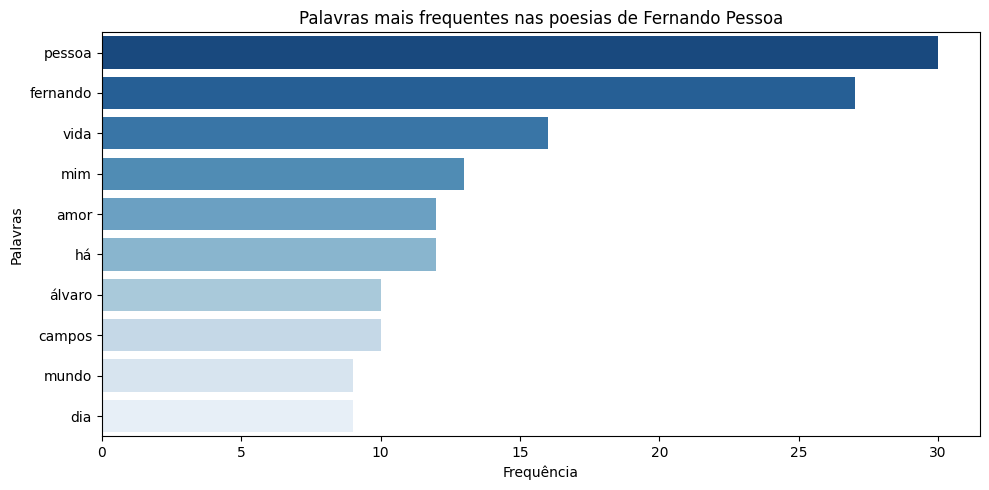

In [7]:
from collections import Counter # Importar a função Counter para contar a frequência das palavras
import pandas as pd # Criar DataFrame para visualização
import seaborn as sns # Importar a biblioteca Seaborn para visualização

# Contar a frequência das palavras
frequencia = Counter(tokens_filtrados)

# Criar DataFrame com as palavras mais frequentes
df_frequencia = pd.DataFrame(frequencia.items(), columns=["Palavras", "Frequência"]).sort_values(by="Frequência", ascending=False).head(10)

# Plotar gráfico de barras
plt.figure(figsize=(10, 5)) # Tamanho do gráfico
ax = sns.barplot(x="Frequência", y="Palavras", data=df_frequencia, palette="Blues_r") # Barplot
plt.xlabel("Frequência") # Legenda do eixo X
plt.ylabel("Palavras") # Legenda do eixo Y
plt.title("Palavras mais frequentes nas poesias de Fernando Pessoa") # Título do gráfico
plt.tight_layout() # Ajustar o layout
plt.show() # Mostrar o gráfico

# Análise Sintática e Estilística
* Atividade:
    * Aplicar POS-Tagging (Etiquetagem Gramatical).
    * Comparar a estrutura gramatical das poesias.
    * Criar um histograma da frequência de diferentes classes gramaticais.

C:\Users\cauac\AppData\Local\Temp\ipykernel_9944\1853726204.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequência", y="POS", data=df_pos, palette="Purples_r")  # Gráfico de barras


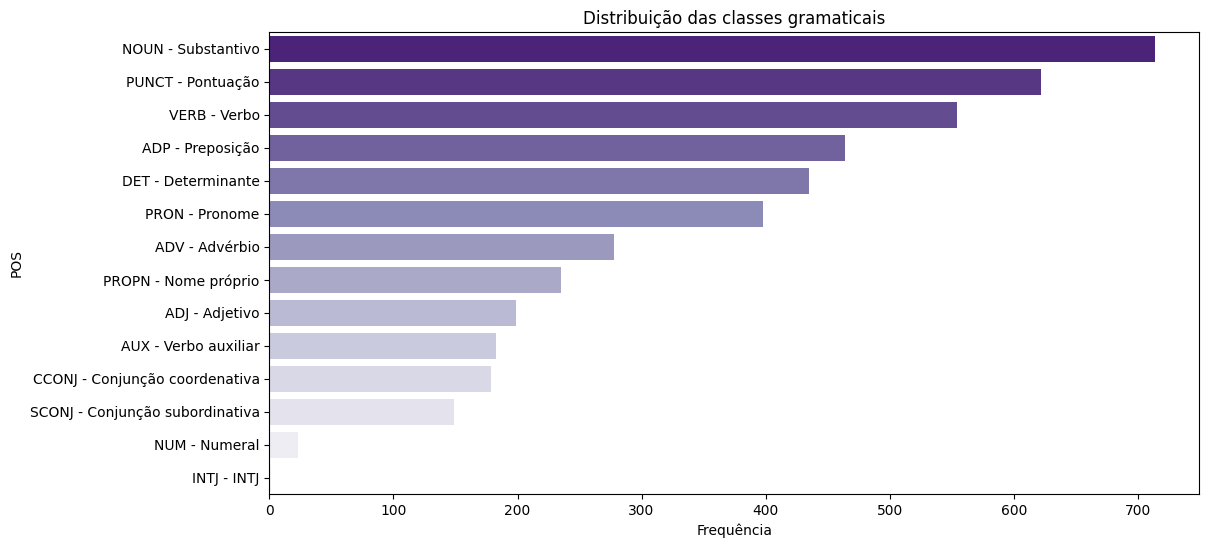

In [8]:
#Extrair classes gramaticais
pos_tags = [token.pos_ for token in doc]

# Contar a frequência de cada classe gramatical
contagem_pos = Counter(pos_tags)

# Mapeamento das classes gramaticais
pos_mapping = {
    "ADJ": "Adjetivo",
    "ADP": "Preposição",
    "ADV": "Advérbio",
    "AUX": "Verbo auxiliar",
    "CCONJ": "Conjunção coordenativa",
    "DET": "Determinante",
    "NOUN": "Substantivo",
    "NUM": "Numeral",
    "PART": "Partícula",
    "PRON": "Pronome",
    "PROPN": "Nome próprio",
    "PUNCT": "Pontuação",
    "SCONJ": "Conjunção subordinativa",
    "SYM": "Símbolo",
    "VERB": "Verbo",
    "X": "Outro"
}

# Substituir os POS pelo mapeamento com a abreviação e a descrição completa
mapped_pos = [f"{pos} - {pos_mapping.get(pos, pos)}" for pos in pos_tags]

# Contar novamente com os mapeamentos
contagem_pos_mapped = Counter(mapped_pos)

# Criar DataFrame para visualização
df_pos = pd.DataFrame(contagem_pos_mapped.items(), columns=["POS", "Frequência"]).sort_values(by="Frequência", ascending=False)

# Plotar gráfico de barras com tamanho maior
plt.figure(figsize=(12, 6))  # Aumentar o tamanho da figura
sns.barplot(x="Frequência", y="POS", data=df_pos, palette="Purples_r")  # Gráfico de barras
plt.xlabel("Frequência")  # Legenda do eixo x
plt.ylabel("POS")  # Legenda do eixo y
plt.title("Distribuição das classes gramaticais")  # Título do gráfico
plt.show()  # Exibir gráfico

# Modelagem de Estilo e Semântica
* Atividade:
    * Calcular a riqueza lexical das poesias.
    * Aplicar TF-IDF para destacar palavras mais importantes.
    * Criar embeddings de palavras para comparação semântica.

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer  # Importar o vetorizador TF-IDF para criar um vetor de palavras

# Garantir que 'corpus' seja uma lista de strings
corpus = [" ".join(corpus)]  # Se o corpus for uma lista de listas, transforme em uma lista de strings

# Criar um vetor TF-IDF
vectorizer = TfidfVectorizer()  # Inicializar o vetorizador
X = vectorizer.fit_transform(corpus)  # Vetorizar o corpus

# Converter o resultado em um DataFrame para visualização
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Somar as pontuações TF-IDF de todas as poesias para cada palavra
pontuacoes_palavras = df_tfidf.sum(axis=0).sort_values(ascending=False)

# Mostrar as 15 palavras mais importantes
top_n = 10
print(pontuacoes_palavras.head(top_n))  # Exibir as top N palavras com maior importância

print("\n")  # Pular uma linha
print("\n")  # Pular uma linha

print("Vetor TF-IDF:\n")  # Exibir o vetor TF-IDF
print(df_tfidf)


que     0.588936
de      0.407725
não     0.289241
se      0.170757
eu      0.153332
em      0.142878
um      0.128939
como    0.125454
da      0.121969
os      0.114999
dtype: float64




Vetor TF-IDF:

       1887      1888      1889      1890      1914     1935        49  \
0  0.003485  0.003485  0.003485  0.003485  0.003485  0.00697  0.003485   

     abismo   abordar  abrissem  ...       vou      voz       vão        vê  \
0  0.003485  0.003485  0.003485  ...  0.013939  0.00697  0.003485  0.010454   

         às    álvaro   árvores     época        és     único  
0  0.013939  0.034848  0.010454  0.003485  0.003485  0.003485  

[1 rows x 1253 columns]


# Comparação com Outros Poetas
* Atividade:
    * Comparar a escrita de Fernando Pessoa com a de outros poetas portugueses.
    * Gerar um modelo de similaridade textual para encontrar diferenças estilísticas.
    * Criar um classificador para tentar identificar quem escreveu um poema com base nas características do texto.


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity # Importando a função de similaridade com cosseno para comparar textos

# Exemplo comparando estilos de diferentes poetas

#Luís de Camões - O tempo acaba o ano, o mês e a hora
corpus_outro_poeta = """
O tempo acaba o ano, o mês e a hora,
A força, a arte, a manha, a fortaleza;
O tempo acaba a fama e a riqueza,
O tempo o mesmo tempo de si chora;

O tempo busca e acaba o onde mora
Qualquer ingratidão, qualquer dureza;
Mas não pode acabar minha tristeza,
Enquanto não quiserdes vós, Senhora.

O tempo o claro dia torna escuro
E o mais ledo prazer em choro triste;
O tempo, a tempestade em grão bonança.

Mas de abrandar o tempo estou seguro
O peito de diamante, onde consiste
A pena e o prazer desta esperança."""

X2 = vectorizer.transform([corpus_outro_poeta])

# Comparar semelhança entre Pessoa e outro poeta
sim = cosine_similarity(X, X2) # Calcular a similaridade com cosseno
print(f"Similaridade entre Fernando Pessoa e outro poeta: {sim[0][0]:.2f}") # Exibir a similaridade


Similaridade entre Fernando Pessoa e outro poeta: 0.29
